<a href="https://colab.research.google.com/github/yeedacoding/TensorFlow-DL/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순차 데이터 (sequential data)

- 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터
- 텍스트는 단어의 순서가 중요한 순차 데이터 -> 데이터의 순서를 유지하며 신경망에 주입하여야 함
- 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요

## 피드포워드 신경망(feedforward neural network, FFNN)

- 입력 데이터의 흐름이 앞으로만 전달되는 신경망
- Fully Connected Neural Network나 CNN의 경우에는 입력한 데이터를 기억하는 장치가 없음 -> 신경망에 메모리가 없음
- 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고
- 다음 샘플을 처리할 때 재사용하지 않음

# 순환 신경망(Recurrent Neural Network, RNN)

- 일반적인 full connected 신경망과 거의 비슷
- full connected 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 됨
- 즉 뉴런의 출력이 다시 자기 자신으로 전달됨 -> 어떠한 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용

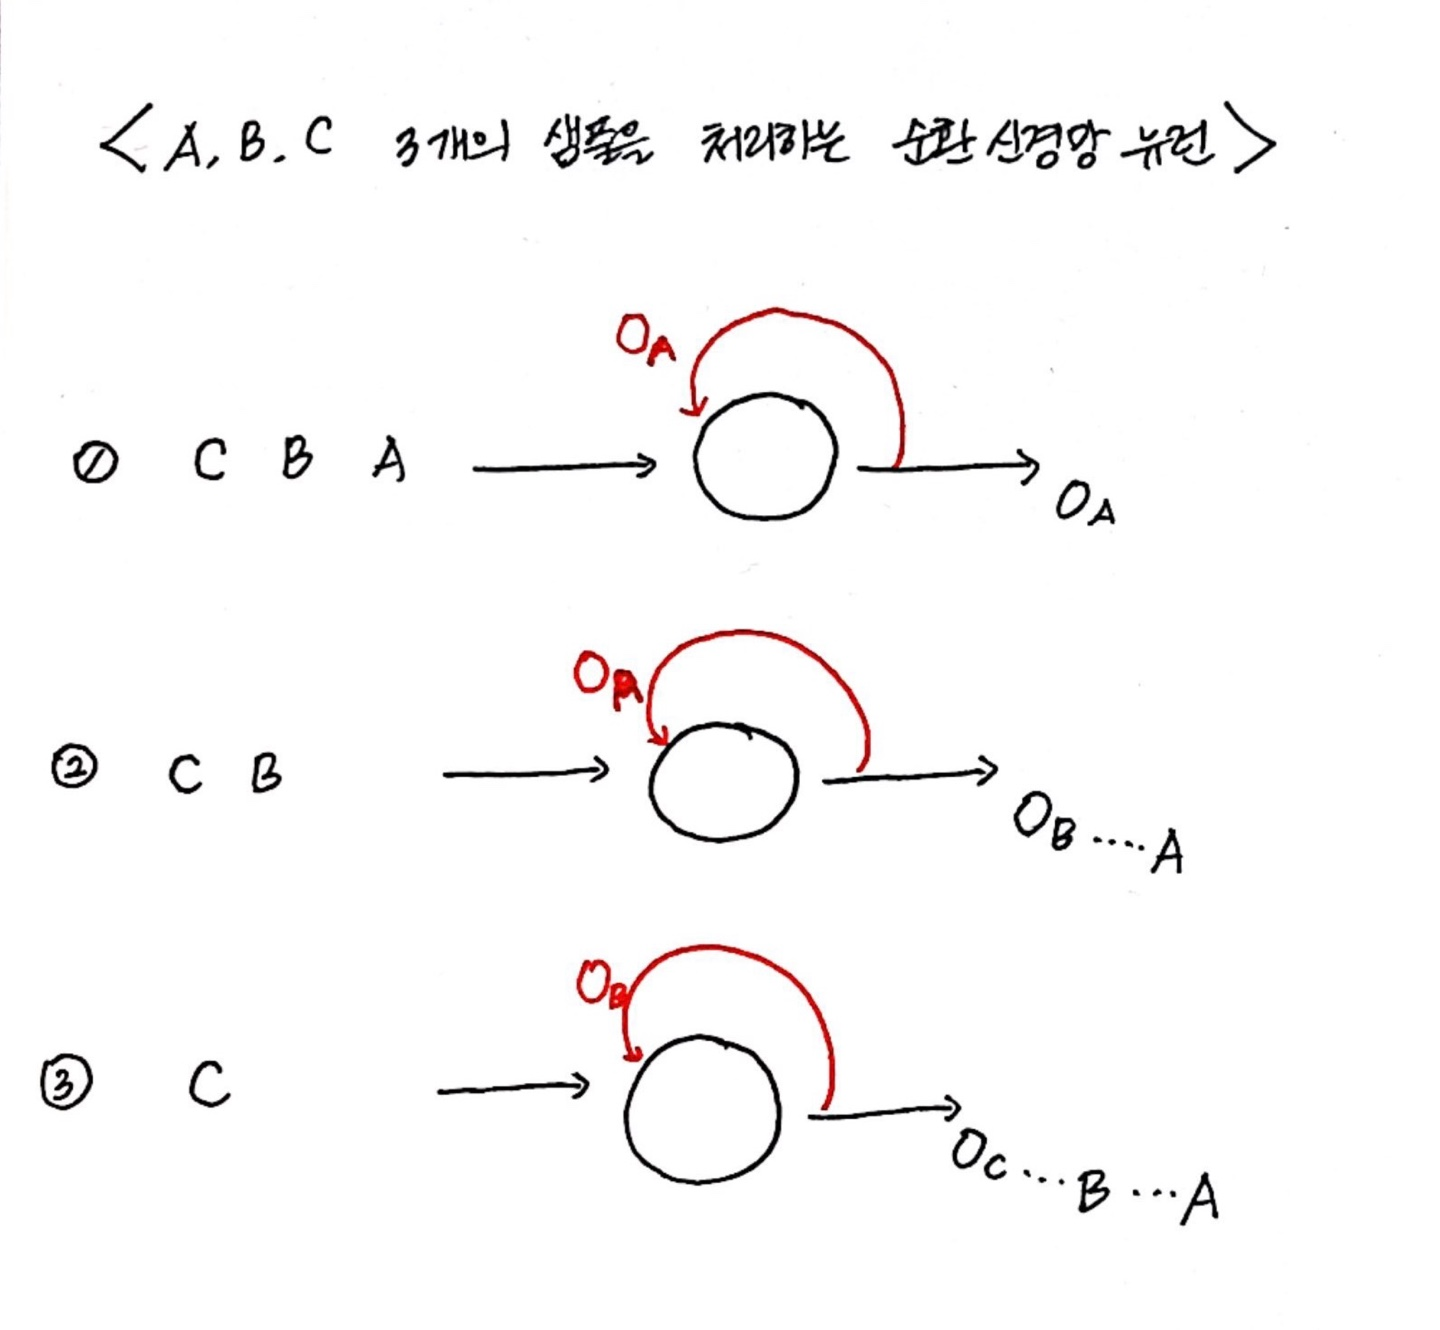

- O는 출력된 결과
1. 첫 번째 샘플 A를 처리하고 난 출력 OA가 다시 뉴런으로 들어감(OA에는 A에 대한 정보가 들어가 있음)
2. 두 번째 샘플 B를 처리할 때 앞에서 A를 사용해 만든 출력 OA를 함께 사용
- OA와 B를 사용해서 만든 OB에는 A에 대한 정보가 어느 정도 포함되어 있고 B에 대한 정보 또한 포함되어 있음
3. 마지막 샘플 C를 처리할 때는 OB를 함께 사용
- OC에는 마찬가지로 B와 A에 대한 정보가 담겨 있음
- 대신 OC에는 A에 대한 정보보다 B에 대한 정보가 더 많이 담겨있음

- 이런식으로 샘플을 처리하는 한 단계를 "타임스텝(timestep)"이라고 함
- 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될 수록 순환되는 정보는 희미해짐
- 셀(cell) : 순환신경망의 순환층
- 한 셀에는 여러 개의 뉴런이 있지만 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
- 은닉 상태(hidden state) : 셀의 출력(이전 예시의 O)
- 즉 "순환 신경망은 셀의 출력(은닉 상태)을 다음 타임 스텝에 재사용한다"

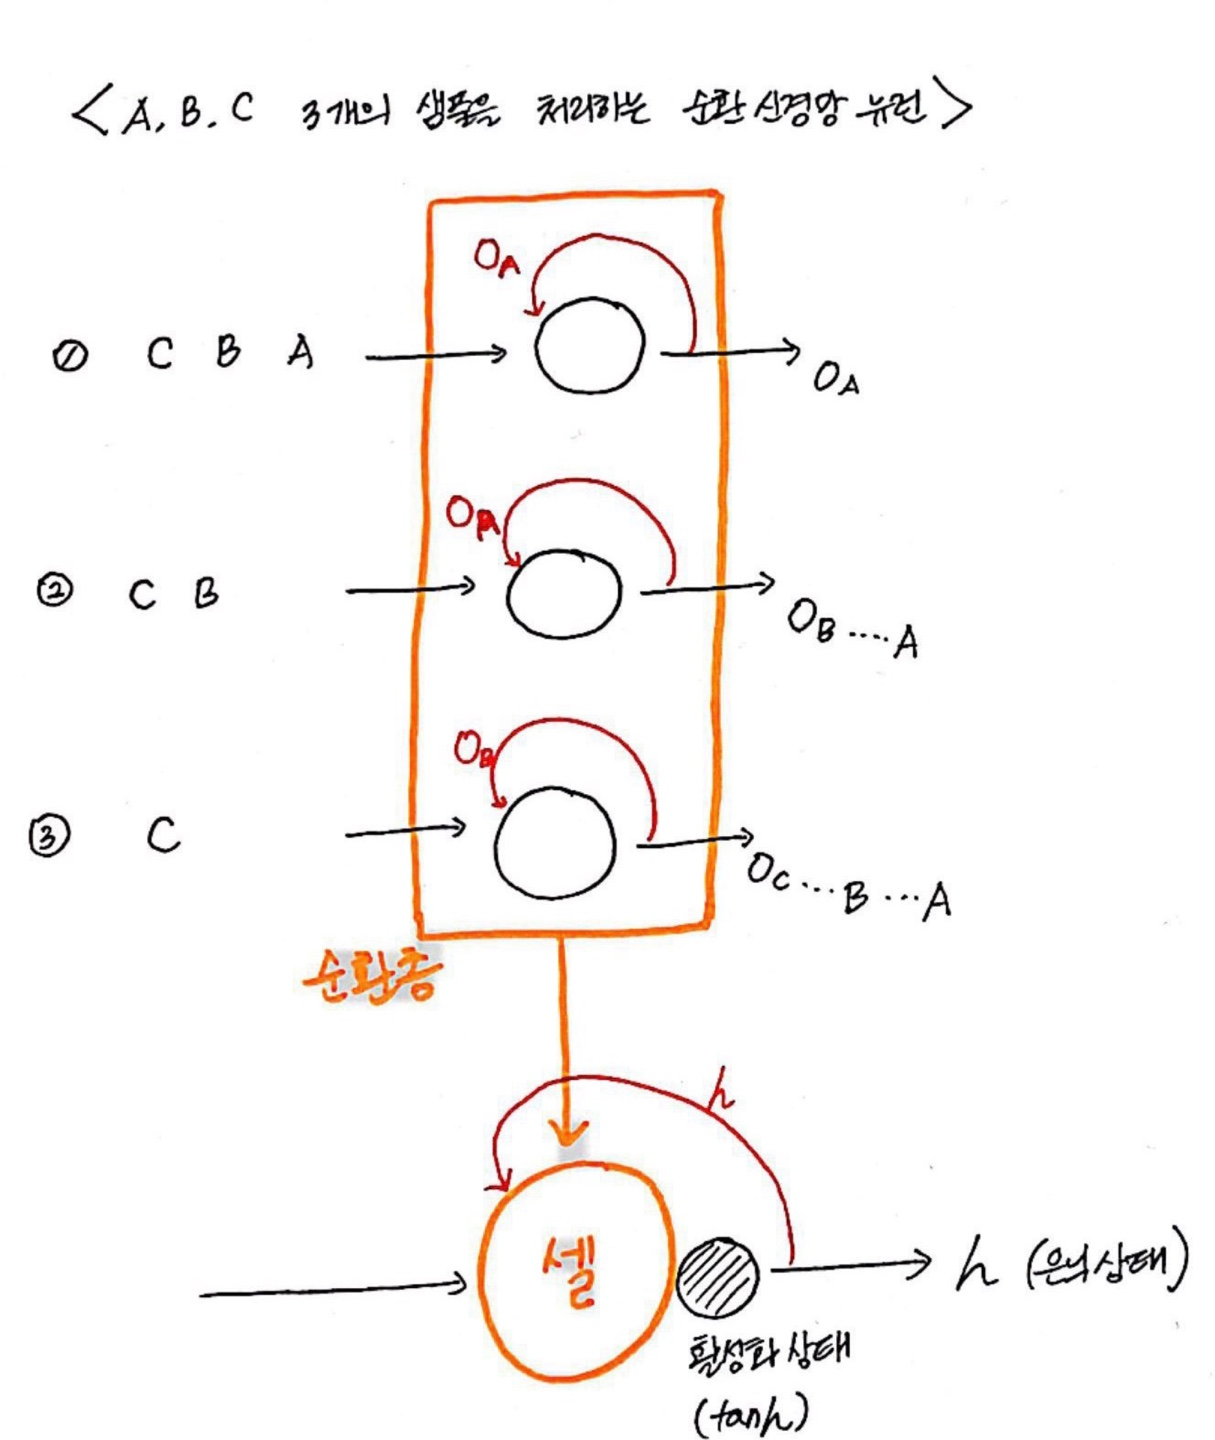

## 순환 신경망 은닉층의 활성화 함수
- 순환 신경망에서 은닉층의 활성화 함수로는 일반적으로 하이퍼볼릭 탄젠트(tanh)가 많이 사용됨
- tanh 함수는 시그모이드 함수와 비슷하지만 -1 ~ 1사이의 범위를 가짐

## 순환 신경망의 모델 파라미터

- 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱함
- 순환 신경망도 마찬가지지만 순환 신경망의 뉴런은 가중치가 하나 더 있음
- ->이전 타임스텝의 은닉상태에 곱해지는 가중치
- 셀 -> 입력 and 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만듦

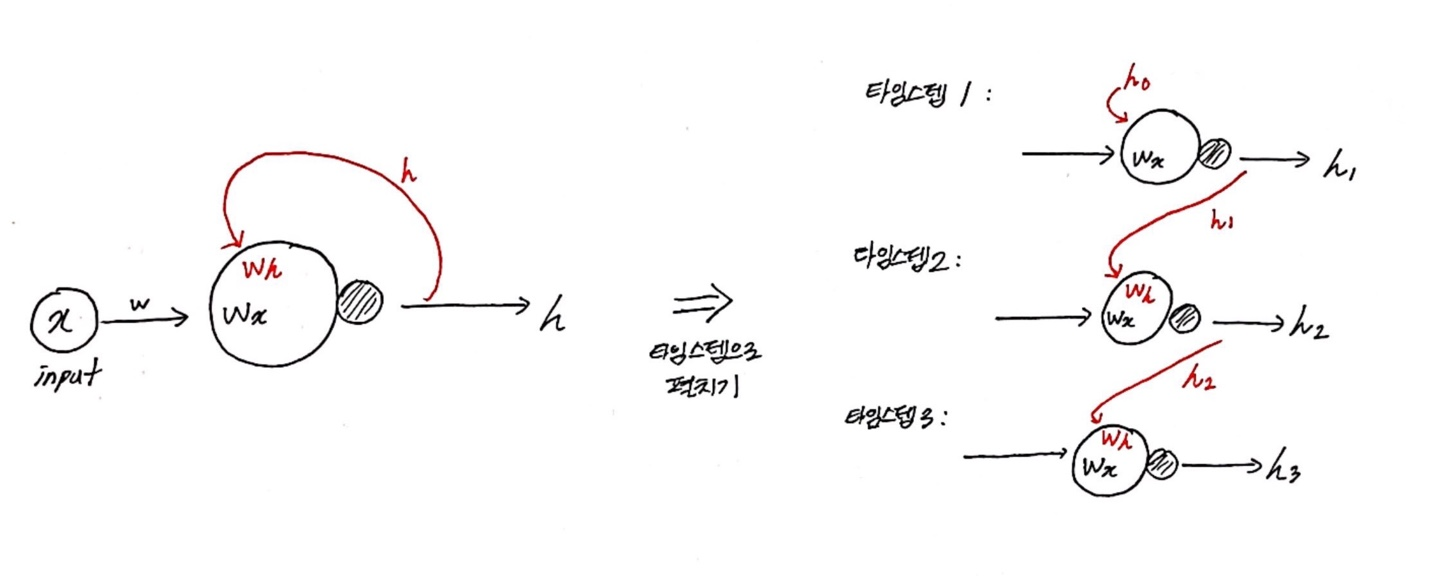

- Wx : 입력에 곱해지는 가중치
- Wh : 이전 타임스텝의 은닉 상태에 곱해지는 가중치
- 물론 뉴런마다 하나의 절편 또한 포함됨
- 맨 처음 샘플을 입력할 때는 이전 타임스텝이 없기 때문에 간단히 h0은 모두 0으로 초기화함
- 타임스텝 1 : 셀의 출력 h1이 가중치 Wh와 곱해지면서 타임스텝 2의 셀로 주입됨
- 타임스텝 2 : 셀의 출력 h2가 가중치 Wh와 곱해지면서 타임스텝 3의 셀로 주입됨
- 즉 모든 타임스텝에서 사용되는 가중치 Wh는 하나이다(=모든 타임스텝에서 동일한 값이다)
- **가중치 Wh는 타임스텝에 따라 변화되는 뉴런의 출력을 학습함**

## 셀의 가중치

- 순환층에 입력되는 특성의 개수 = 4개, 순환층의 뉴런 개수 = 3개(r1, r2, r3)라고 가정
- Wx : 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 Wx의 크기 = 4*3 = 12개
- Wh : 순환층에 있는 첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달됨
- 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전 연결됨
- 두 번째 뉴런의 은닉 상태, 세 번째 뉴런의 은닉 상태 모두 마찬가지로 순환층에 있는 모든 뉴런에 완전 연결됨
- 따라서 이 순환층에서 은닉 상태를 위한 가중치 Wh의 개수 = 3*3 = 9
- 모델 파라미터는 ? Wx 개수 + Wh 개수 + 절편 = 12 + 9 + 3 = 24
- **은닉 상태가 모든 뉴런에 순환되기 때문에 모든 연결선을 표현하기 힘들어 순환층을 하나의 셀로 표현하는 것**
